In [2]:
pip install statsmodels --upgrade --user

Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import datetime
import seaborn as sns
import statsmodels
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

Populating the interactive namespace from numpy and matplotlib


In [6]:
df=pd.read_csv('Price_Rev_Hotel_Clean.csv', sep = '\t')

In [7]:
df.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,YR_MNTH_ind,number_of_guests
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-July,2.0
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-July,2.0
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-July,1.0
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-July,1.0
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-July,2.0


In [8]:
df.columns.values

array(['Unnamed: 0', 'hotel', 'is_canceled', 'lead_time',
       'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'YR_MNTH_ind',
       'number_of_guests'], dtype=object)

In [9]:
df.dtypes

Unnamed: 0                          int64
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                      

In [9]:
df['date']=df['arrival_date_year'].astype(str)+"-"+df['arrival_date_month'].astype(str)+"-"\
                                              +df['arrival_date_day_of_month'].astype(str)

In [10]:
df['date']=pd.to_datetime(df['date'])

In [11]:
df['date']=df['date'].dt.strftime('%m/%d/%Y')

In [13]:
df.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,YR_MNTH_ind,number_of_guests,date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-July,2,07/01/2015
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-July,2,07/01/2015
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-July,1,07/01/2015
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-July,1,07/01/2015
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-July,2,07/01/2015


In [14]:
df_canceled=df[['is_canceled','date']].groupby('date')['is_canceled'].sum()*100.0/df[['is_canceled','date']].groupby('date')['is_canceled'].count()

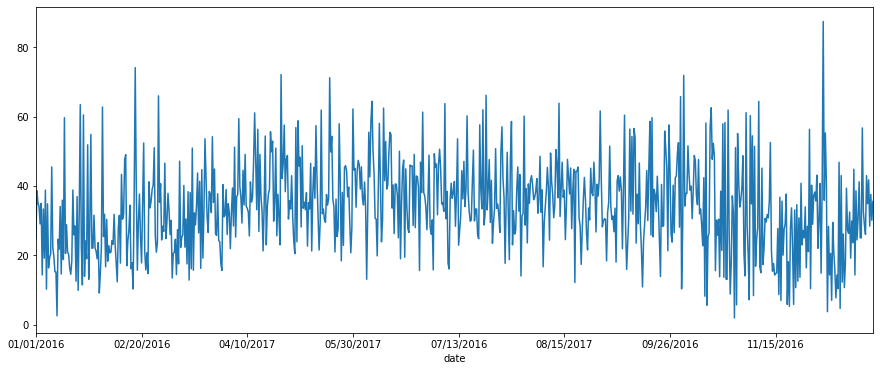

In [15]:
plt.rcParams['figure.figsize']=(15,6)
df_canceled.plot()

In [16]:
result=adfuller(df_canceled)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))

ADF Statistic: -3.444545863675217
p-value: 0.009530858855435942


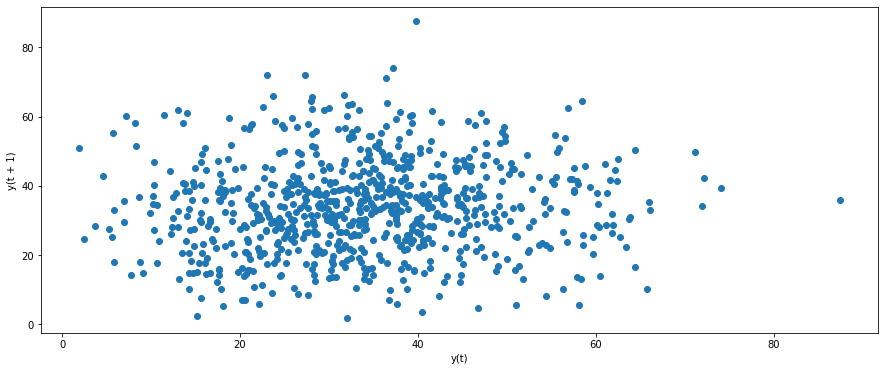

In [17]:
plt.rcParams['figure.figsize']=(15,6)
lag_plot(df_canceled)

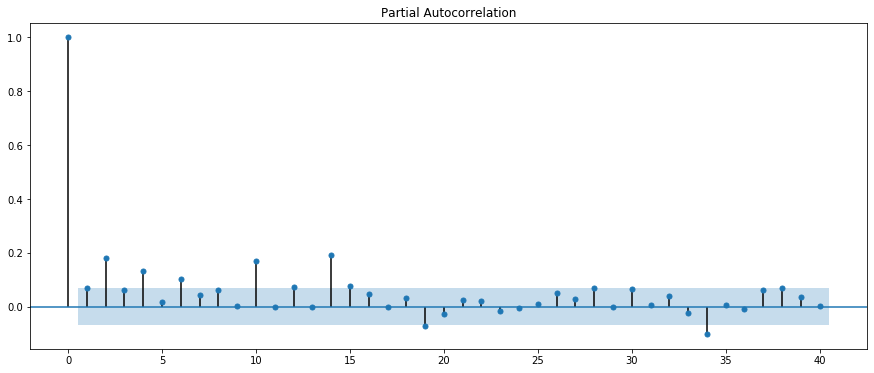

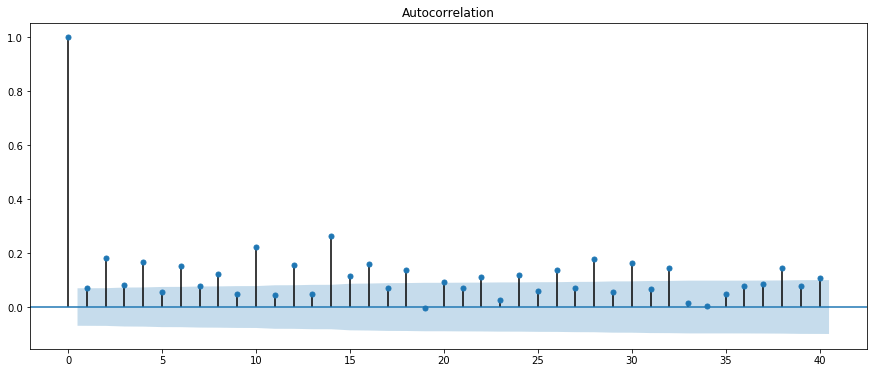

In [18]:
plot_pacf(df_canceled, lags=40)
plot_acf(df_canceled, lags=40)
plt.show()

In [105]:
train=df_canceled[:len(df_canceled)-10]
test=df_canceled[len(df_canceled)-10:]

In [106]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [107]:
model_ar=AutoReg(train,lags=20)
results_ar=model_ar.fit()
fc_ar=results_ar.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)
fc_df=pd.DataFrame(fc_ar.values,index=test.index,columns=['pred_ar'])
error_ar=mean_absolute_percentage_error(test.values,fc_ar.values)
print("Test MAPE for AR model:", error_ar)

Test MAPE for AR model: 12.839107458368579


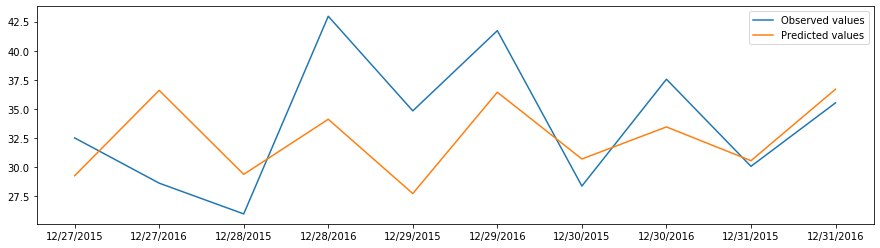

In [108]:
plt.rcParams["figure.figsize"]=(15,4)
plt.plot(test,label="Observed values")
plt.plot(fc_df,label="Predicted values")
plt.legend()
plt.show()

In [109]:
model_arima=ARIMA(train,order=(2,0,2))
results_arima=model_arima.fit()
fc_arima=results_arima.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)
fc_df=pd.DataFrame(fc_ar.values,index=test.index,columns=['pred_ar'])
error_arima=mean_absolute_percentage_error(test.values,fc_arima.values)
print("Test MAPE for ARIMA model:", error_arima)

Test MAPE for AR model: 16.688646505700728


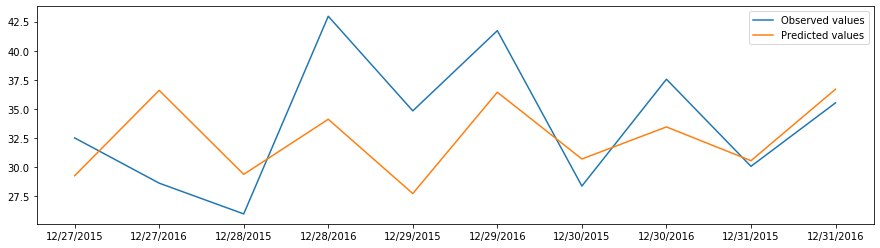

In [110]:
plt.rcParams["figure.figsize"]=(15,4)
plt.plot(test,label="Observed values")
plt.plot(fc_df,label="Predicted values")
plt.legend()
plt.show()

In [111]:
model_sarima=SARIMAX(train,order=(2, 0, 2),seasonal_order=(2, 0, 2, 7))
results_sarima=model_sarima.fit()
fc_sarima=results_sarima.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)
fc_df=pd.DataFrame(fc_sarima.values,index=test.index,columns=['pred_ar'])
error_sarima=mean_absolute_percentage_error(test.values,fc_sarima.values)
print("Test MAPE for SARIMA model:", error_sarima)

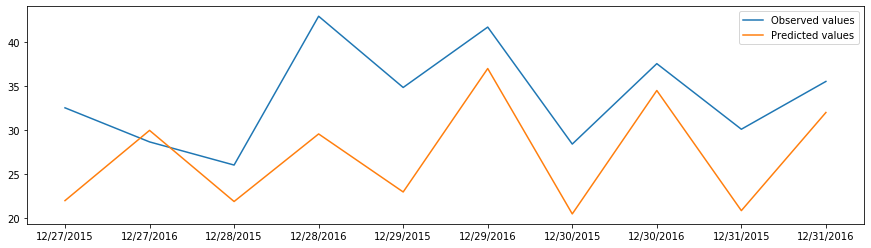

In [114]:
plt.rcParams["figure.figsize"]=(15,4)
plt.plot(test,label="Observed values")
plt.plot(fc_df,label="Predicted values")
plt.legend()
plt.show()